<a href="https://colab.research.google.com/github/the-terror-wonder/Glaucoma_detection-DL/blob/main/glaucoma_detection_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
preprocess_input = resnet50.preprocess_input
ResNet50 = resnet50.ResNet50

In [ ]:
# Paths
train_path = '/content/drive/MyDrive/merged_dataset/train'
valid_path = '/content/drive/MyDrive/merged_dataset/validation'



In [ ]:

# Load VGG19 model without top layers
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Set layers to non-trainable
for layer in resnet.layers:
    layer.trainable = False
for layer in resnet.layers[-20:]:
    layer.trainable = True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Count the number of classes
folders = glob(train_path + '/*')

# Define model architecture
x = Flatten()(resnet.output)
x = Dense(512, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.6)(x)  # Dropout layer for regularization
prediction = Dense(len(folders), activation='softmax', kernel_regularizer='l2')(x)

# Create the model
model = Model(inputs=resnet.input, outputs=prediction)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,969,474 (285.99 MB)

 Trainable params: 60,313,090 (230.08 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

In [ ]:
# Image data generators with enhanced augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Additional augmentation
    width_shift_range=0.2,
    height_shift_range=0.2
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Training and validation sets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)



valid_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)




Found 4500 images belonging to 2 classes.
Found 564 images belonging to 2 classes.


In [ ]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Early stopping and checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/best_model_better_test.keras', save_best_only=True, monitor='val_loss')

#managed class imbalance
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(training_set.classes), y=training_set.classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


# Fit the model with early stopping and checkpoint
r = model.fit(
    training_set,
    validation_data=valid_set,
    epochs=100,  # Increased epochs for better training
    batch_size=16,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict
)

# Save the model
model.save('/content/drive/MyDrive/model/glaucoma_detection_model_100_batch16.keras')
# !cp /content/best_model_better_test.keras /content/drive/MyDrive/merged_dataset/trained_model
# Plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss.png')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('AccVal_acc.png')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


# **Trained model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
preprocess_input = resnet50.preprocess_input
ResNet50 = resnet50.ResNet50

In [ ]:
# Load the best model for prediction
model1 = tf.keras.models.load_model('/content/drive/MyDrive/model/glaucoma_detection_model_100_batch32.keras')


In [ ]:
class_indices = {0:'glaucoma', 1:'normal'}

# Function to predict glaucoma in an image and return the prediction
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model1.predict(img_array)
    print(prediction);
    predicted_class = np.argmax(prediction[0])
    class_name = class_indices[predicted_class]  # Map to class name
    return (class_name, img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.987879   0.01212102]]


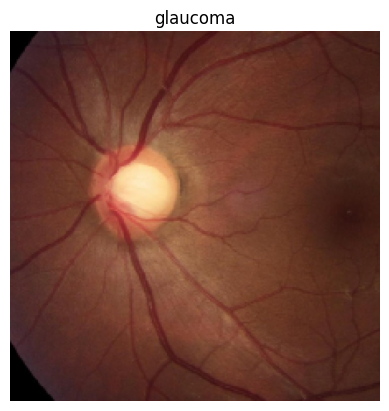

In [ ]:
result, img = predict_image('/content/drive/MyDrive/merged_dataset/test/glaucoma/2228.jpg')
plt.imshow(img)
plt.axis('off')
plt.title(result)
plt.show()